In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
plt.style.use('seaborn')

In [5]:
dfx = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\KNN\KNN Assignment\Diabetes_XTrain.csv")
dfy = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\KNN\KNN Assignment\Diabetes_YTrain.csv")
print(dfx)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
0                       0.787   40  
1                       0.237   58  


In [6]:
# let's generate numpy arrays 
X = dfx.values
Y = dfy.values
# print(X)
# this is the serial number which we don't want , so we drop the first column and similarly for y also 
X = X[:,0:]
Y = Y[:,0].reshape((-1,))

print(dfx)
print(dfy)

print(X.shape)
print(Y.shape)

#print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
0                       0.787   40  
1                       0.237   58  


In [7]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=7):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

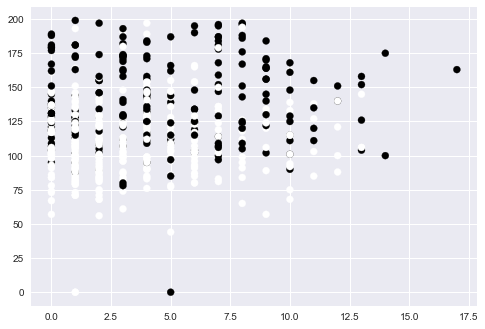

In [8]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()


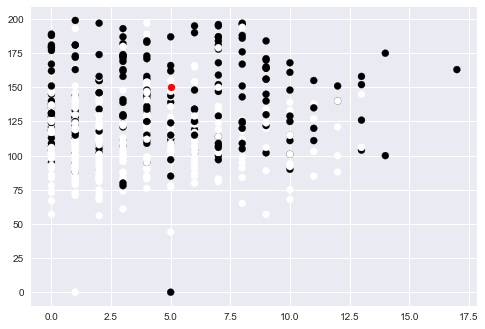

In [9]:
# generating query point and making predictions 
query_x = np.array([5,150])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [10]:
dfx_test = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\KNN\KNN Assignment\Diabetes_XTest.csv")

In [11]:
x_test = dfx_test.values
x_test = x_test[:, 0:]

In [12]:
m = x_test.shape[0]

predicted=[]

for i in range(m):
    q = int(knn(X,Y,x_test[i]))
    predicted.append(q)

(array([0., 1.]), array([3, 4], dtype=int64))
(array([0., 1.]), array([5, 2], dtype=int64))
(array([0., 1.]), array([6, 1], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([0., 1.]), array([2, 5], dtype=int64))
(array([0., 1.]), array([2, 5], dtype=int64))
(array([0., 1.]), array([4, 3], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([0., 1.]), array([4, 3], dtype=int64))
(array([1.]), array([7], dtype=int64))
(array([0., 1.]), array([6, 1], dtype=int64))
(array([0., 1.]), array([1, 6], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([0., 1.]), array([4, 3], dtype=int64))
(array([0., 1.]), array([6, 1], dtype=int64))
(array([0., 1.]), array([5, 2], dtype=int64))
(array([0., 1.]), array([1, 6], dtype=int64))
(array([0., 1.]), array([2, 5], dtype=int64))
(array([0., 1.]), array([2, 5], dtype=int64))
(array([0., 1.]), array([4, 3], dtype=int64))
(array([0., 1.]), array([5, 2], dtype=int64))
(array([0., 1.]), array

(array([0., 1.]), array([3, 4], dtype=int64))
(array([0., 1.]), array([3, 4], dtype=int64))
(array([0., 1.]), array([5, 2], dtype=int64))
(array([0., 1.]), array([3, 4], dtype=int64))
(array([0., 1.]), array([3, 4], dtype=int64))
(array([0., 1.]), array([2, 5], dtype=int64))
(array([0., 1.]), array([3, 4], dtype=int64))
(array([0., 1.]), array([6, 1], dtype=int64))


In [13]:
frames=[dfx,dfy]
dfz=pd.concat(frames,axis=1)

print(dfz)
Z=dfz.values
print(Z)

class1=dfz[(dfz['Outcome']==1)]
class0=dfz[(dfz['Outcome']==0)]

print(class0)
print(class1)

c0_1=np.array(class0['Pregnancies'].values)
c0_2=np.array(class0['Glucose'].values)
c0_3=np.array(class0['BloodPressure'].values)
c0_4=np.array(class0['SkinThickness'].values)
c0_5=np.array(class0['Insulin'].values)
c0_6=np.array(class0['BMI'].values)
c0_7=np.array(class0['DiabetesPedigreeFunction'].values)
c0_8=np.array(class0['Age'].values)

c1_1=np.array(class1['Pregnancies'].values)
c1_2=np.array(class1['Glucose'].values)
c1_3=np.array(class1['BloodPressure'].values)
c1_4=np.array(class1['SkinThickness'].values)
c1_5=np.array(class1['Insulin'].values)
c1_6=np.array(class1['BMI'].values)
c1_7=np.array(class1['DiabetesPedigreeFunction'].values)
c1_8=np.array(class1['Age'].values)
print(c0_1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.787   40        1  
1                  

2.42


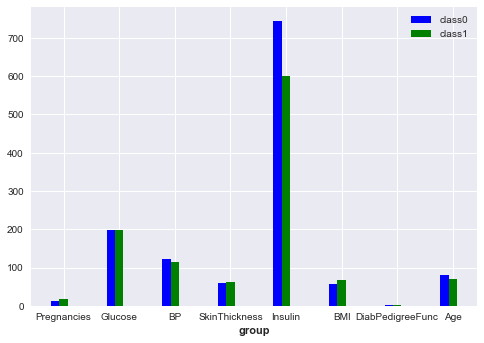

In [15]:
barWidth = 0.15
print(c1_7.max())
bars1 = [c0_1.max(),c0_2.max(),c0_3.max(),c0_4.max(),c0_5.max(),c0_6.max(),c0_7.max(),c0_8.max()]
bars2 = [c1_1.max(),c1_2.max(),c1_3.max(),c1_4.max(),c1_5.max(),c1_6.max(),c1_7.max(),c1_8.max()]
bars1=np.array(bars1)
bars2=np.array(bars2)
r1 = np.arange(len(bars1))
r2 = []
for x in r1:
    r2.append(barWidth+x)
r2=np.array(r2)
plt.bar(r1, bars1, color='blue', width=barWidth, label='class0')
plt.bar(r2, bars2, color='green', width=barWidth, label='class1')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin' , 'BMI' , 'DiabPedigreeFunc' , 'Age'])
plt.legend()
plt.show()